In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving nilai_mapel.csv to nilai_mapel.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['nilai_mapel.csv']))
df.head()
# Dataset is now stored in a Pandas Dataframe

,Matematika,Bahasa Indonesia,IPA,IPS,Bahasa Inggris,Penjaskes,Seni Budaya,OUTPUT
0,77,65,82,93,74,70,70,Interpersonal
1,89,77,90,82,85,70,77,Logika
2,83,90,80,64,92,80,70,Verbal
3,84,96,85,67,97,80,80,Verbal
4,75,92,80,72,91,80,82,Verbal


In [5]:
x = df.iloc[:,0:7].values
y = df.iloc[:,7].values

print(x[0:5])
print(y[0:5])

[[77 65 82 93 74 70 70]
 [89 77 90 82 85 70 77]
 [83 90 80 64 92 80 70]
 [84 96 85 67 97 80 80]
 [75 92 80 72 91 80 82]]
['Interpersonal' 'Logika' 'Verbal' 'Verbal' 'Verbal']


In [6]:
#Check the number of rows in x and y
print('The number of data in x:',len(x))
print('The number of data in x:',len(y))

The number of data in x: 100
The number of data in x: 100


In [7]:
print(x.shape)
print(y.shape)


(100, 7)
(100,)


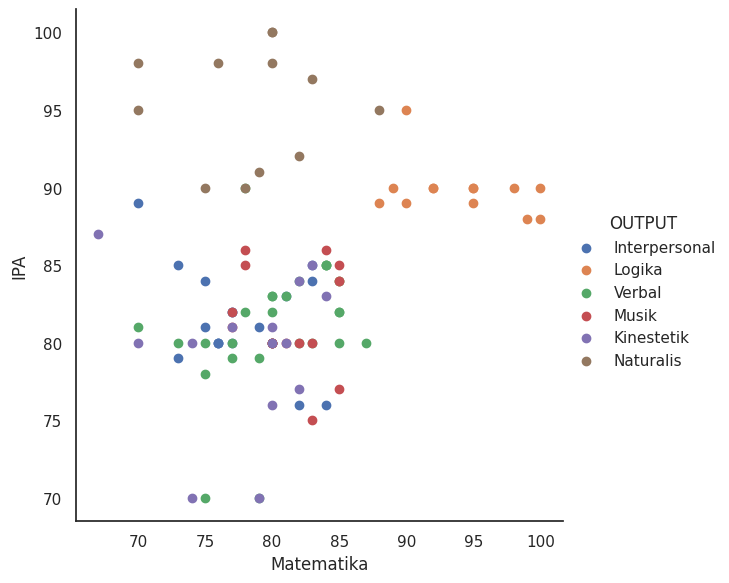

In [8]:
sns.FacetGrid(df, hue="OUTPUT", height=6).map(plt.scatter,"Matematika", "IPA").add_legend()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)


In [10]:
print(y1)

[0 2 5 5 5 3 0 1 2 4 1 5 0 2 2 5 4 5 1 0 5 0 3 3 2 0 0 1 1 3 3 2 3 5 2 2 1
 5 2 5 4 0 1 4 0 3 5 3 1 4 5 3 4 5 3 4 0 1 2 4 1 5 5 5 1 0 5 4 3 5 0 1 0 5
 5 0 3 5 2 0 2 0 5 4 3 1 2 0 3 0 5 5 5 1 2 5 4 4 3 5]


In [11]:
y = pd.get_dummies(y1).values
print(y[0:5])

[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Split into training,  validation, adn test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1765, random_state=42)
print(x_train[0:5])

[[82 64 76 98 75 85 75]
 [90 66 89 77 60 79 79]
 [88 72 95 70 62 80 80]
 [85 80 84 75 81 80 95]
 [70 72 89 94 69 60 77]]


In [14]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2765, random_state=42)
print(x_train[0:5])

[[76 71 98 67 70 60 70]
 [77 76 80 96 67 80 75]
 [80 93 83 70 90 75 70]
 [77 73 82 66 74 80 97]
 [82 81 77 83 74 90 85]]


In [15]:
print(y_train[0:5])

[[0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]]


In [16]:
print(x_val[0:5])
print(y_val[0:5])

[[ 80  79 100  90  81  70  80]
 [ 81  96  83  80  97  70  80]
 [ 81  78  83  99  80  80  70]
 [ 80  77  80  63  70  80  90]
 [ 77  72  82 100  75  80  85]]
[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]]


In [17]:
# Set the global random seed
tf.random.set_seed(1234)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
model

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 41.6392 - accuracy: 0.2083 - val_loss: 27.2062 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 24.5394 - accuracy: 0.1667 - val_loss: 21.3509 - val_accuracy: 0.1786
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 18.0595 - accuracy: 0.2361 - val_loss: 13.9929 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 11.8924 - accuracy: 0.1944 - val_loss: 10.6887 - val_accuracy: 0.2143
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 8.1842 - accuracy: 0.3194 - val_loss: 7.1278 - val_accuracy: 0.3214
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 5.5063 - accuracy: 0.3472 - val_loss: 5.5210 - val_accuracy: 0.2857
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 4.6005 - accuracy: 0.3333 - val_loss: 3.2837 - val_accuracy: 0.2143
Epoch 8/100

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,790
Trainable params: 2,790
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.16120223701000214
Test accuracy: 0.9642857313156128


In [23]:
# Mendapatkan riwayat training_loss
train_loss = history.history['loss']

In [24]:
# Mendapatkan riwayat validation_loss
val_loss = history.history['val_loss']

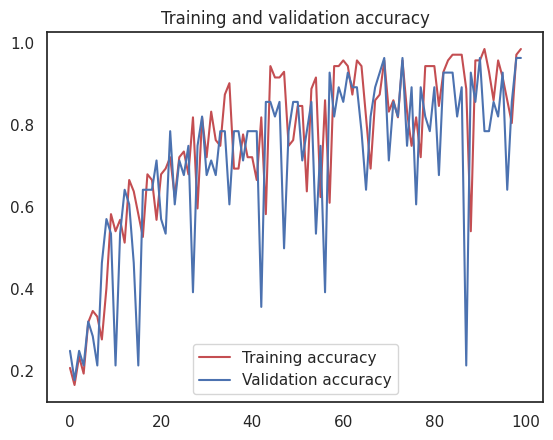

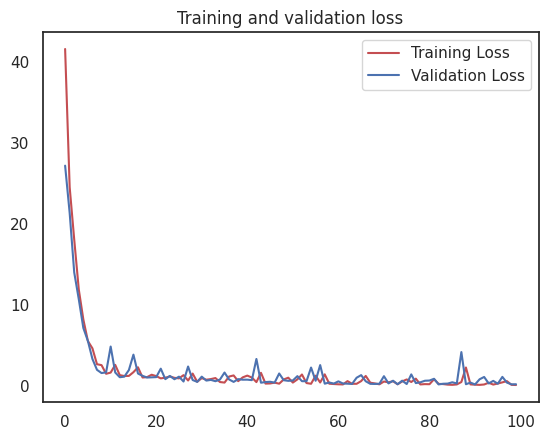

In [25]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
y_pred = model.predict(x_val)
y_pred

1/1 [==============================] - 0s 95ms/step


array([[1.02412343e-01, 4.06955508e-07, 5.09177102e-04, 1.93556232e-04,
        8.96376669e-01, 5.07886114e-04],
       [7.86181699e-05, 7.18449314e-07, 7.95516098e-06, 6.15557889e-04,
        3.74179031e-03, 9.95555222e-01],
       [9.93954062e-01, 1.55049594e-04, 1.14206150e-05, 4.14550698e-07,
        5.77171519e-03, 1.07506901e-04],
       [7.13587315e-06, 1.14839501e-03, 2.61759506e-05, 9.19606209e-01,
        7.86784515e-02, 5.33668906e-04],
       [9.69907820e-01, 6.99685115e-05, 7.49678804e-07, 1.59147166e-04,
        2.98442524e-02, 1.82778786e-05],
       [6.09550113e-07, 3.62173455e-06, 7.55115423e-07, 1.72418868e-03,
        4.27255291e-04, 9.97843504e-01],
       [1.51177635e-03, 2.82298447e-06, 2.45993779e-05, 8.28549147e-01,
        1.55547395e-01, 1.43642789e-02],
       [1.10302517e-05, 4.66437268e-06, 8.85411441e-01, 1.74312852e-02,
        9.71410424e-02, 5.30491150e-07],
       [1.82291988e-04, 9.12909806e-01, 1.39500185e-06, 1.61612704e-02,
        7.05651566e-02, 

In [27]:
actual = np.argmax(y_val,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predict ed: {predicted}")

Actual: [4 5 0 3 0 5 3 2 1 0 1 3 5 5 5 5 3 5 0 2 4 3 0 1 5 5 4 4]
Predict ed: [4 5 0 3 0 5 3 2 1 0 1 3 5 5 5 5 3 5 0 4 4 3 0 1 5 5 4 4]


In [28]:
#EVALUASI MODEL
import sklearn.metrics
# Check the accuracy score on the test set
print('Accuracy:', sklearn.metrics.accuracy_score(actual, predicted))

# Check the precision score on the test set
print('Precision:', sklearn.metrics.precision_score(actual, predicted, average='weighted'))

# Check the recall score on the test set
print('Recall:', sklearn.metrics.recall_score(actual, predicted, average='weighted'))

# Check the f1 score on the test set
print('F1:', sklearn.metrics.f1_score(actual, predicted, average='weighted'))

Accuracy: 0.9642857142857143
Precision: 0.9714285714285714
Recall: 0.9642857142857143
F1: 0.9603174603174603


In [31]:
#menyimpan model
from google.colab import files
model.save('model.h5')